In [0]:
#import tensorflow as tf
from keras.models import load_model
from keras.utils.vis_utils import plot_model
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [25]:
model = load_model('/content/drive/My Drive/Emusica/emotion_model.hdf5', compile=False)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [26]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 62, 62, 8)    72          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 62, 62, 8)    32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 62, 62, 8)    0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

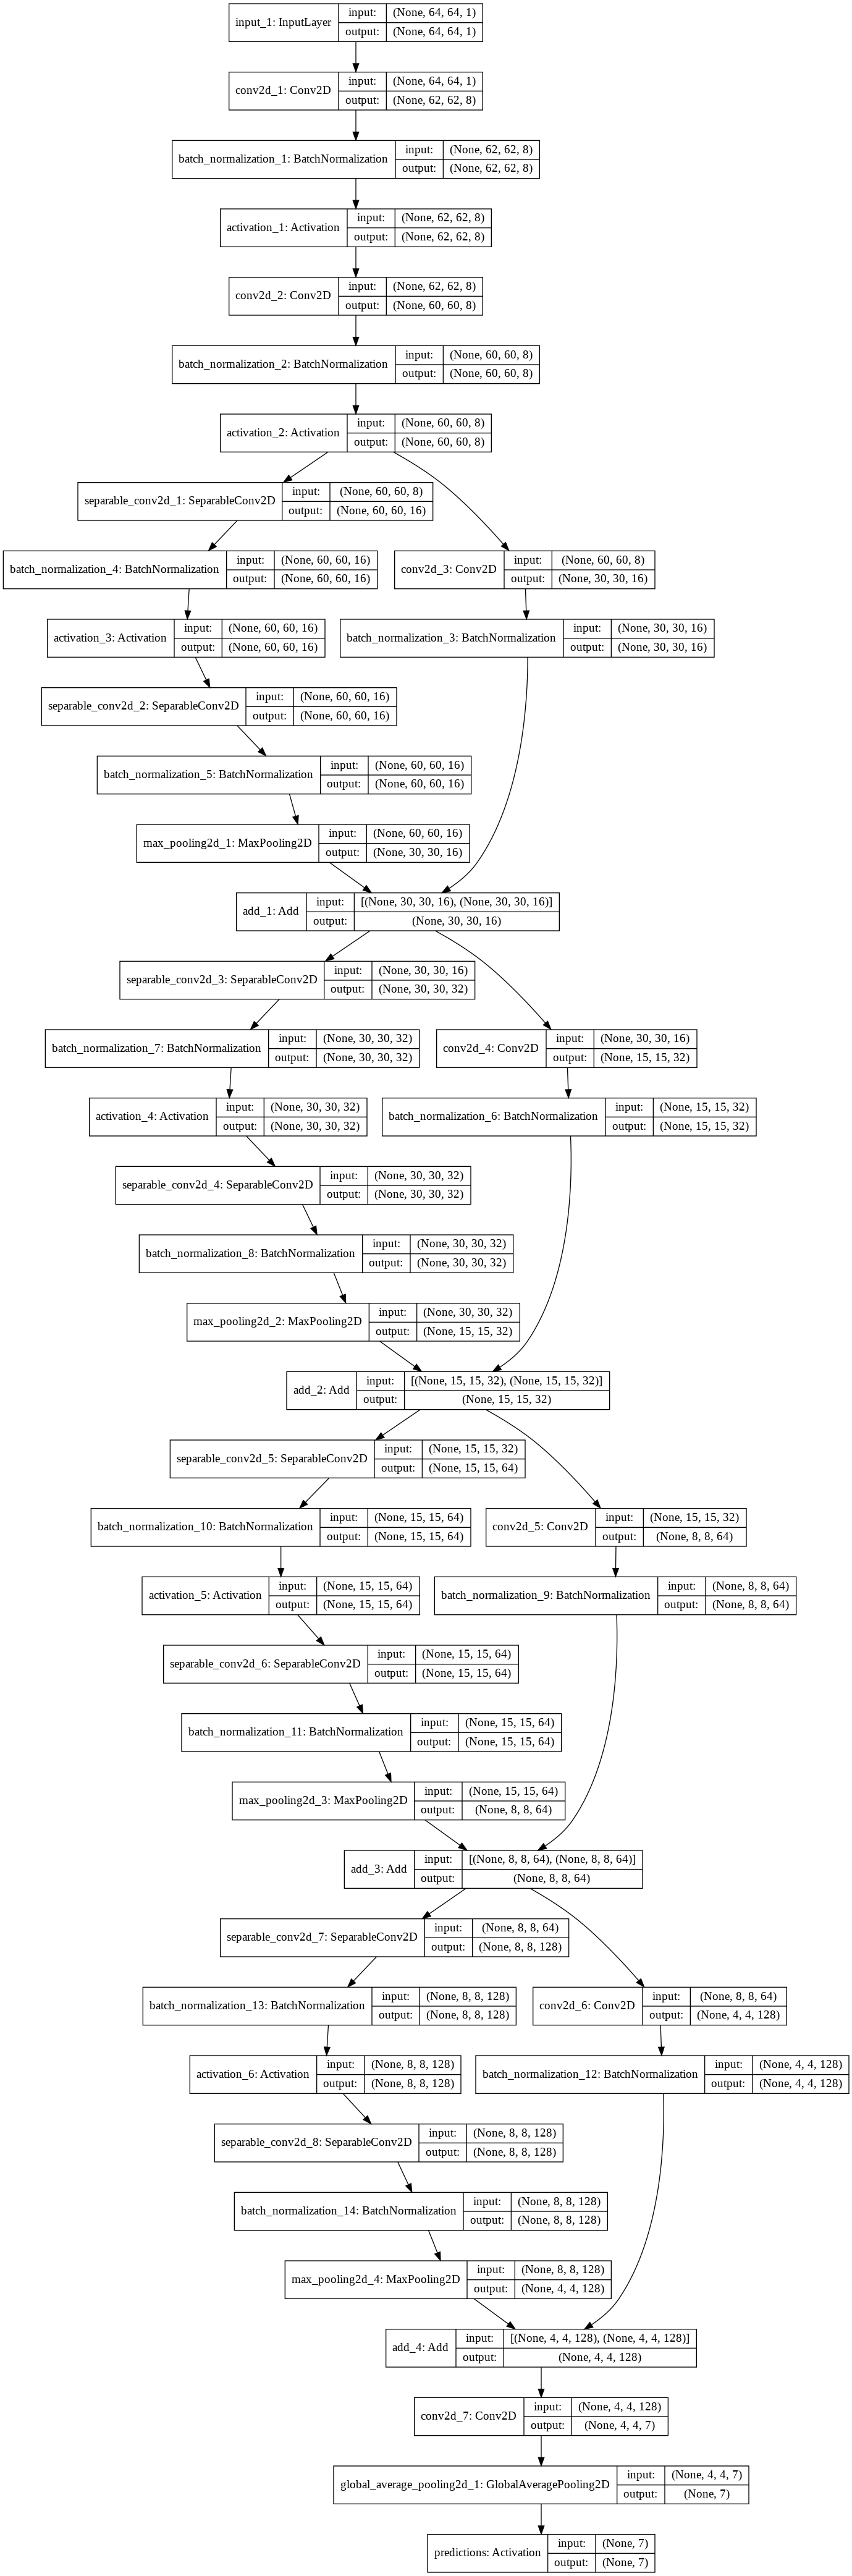

In [27]:
plot_model(model, to_file= 'emotion_model.png', show_shapes=True)

In [0]:
def convert_model(model):
  converter = tf.lite.TFLiteConverter.from_keras_model_file(model)
  tflite_model = converter.convert()
  return tflite_model


In [31]:
tflite_model = convert_model('/content/drive/My Drive/Emusica/emotion_model.hdf5')
open("converted_model.tflite", "wb").write(tflite_model)

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 80 variables.
INFO:tensorflow:Converted 80 variables to const ops.


234936